# Import

In [20]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.9 MB/s eta 0:00:00


In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import drive
import pywt

# Explanation method for data cleaning

In [6]:
img = cv2.imread('/content/drive/MyDrive/famous-people-detector/images_dataset/lionel_messi/1211643746.jpg.0.jpg')
img.shape

(800, 1200, 3)

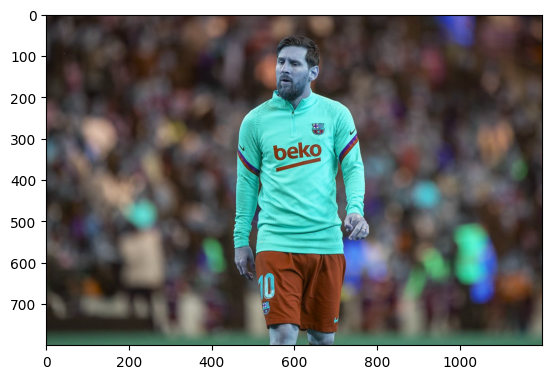

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

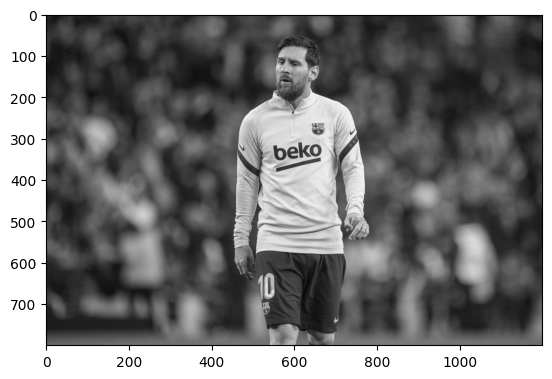

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/famous-people-detector/haarcascades/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/famous-people-detector/haarcascades/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[534,  78, 102, 102]], dtype=int32)

In [11]:
(x, y, w, h) = faces [0]
x,y,w,h

(534, 78, 102, 102)

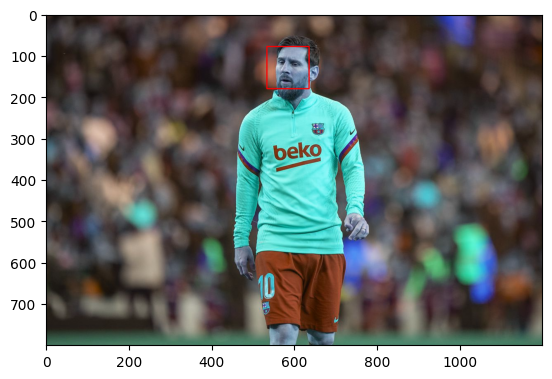

In [12]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

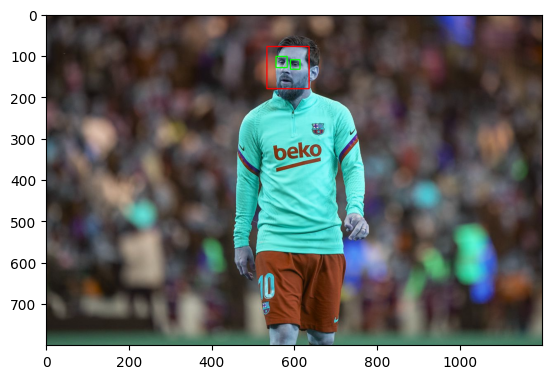

In [13]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

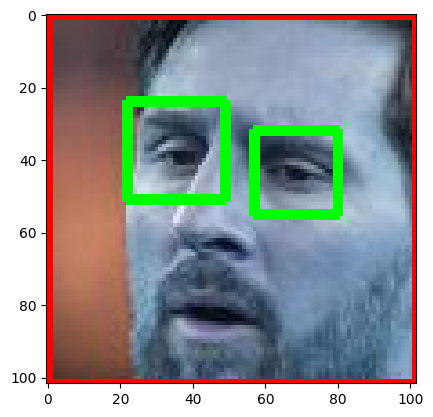

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def cropped_img_with_2_eyes (image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
      return roi_color

# so if the image not clear or the eyes isn't visible, the function will return nothing

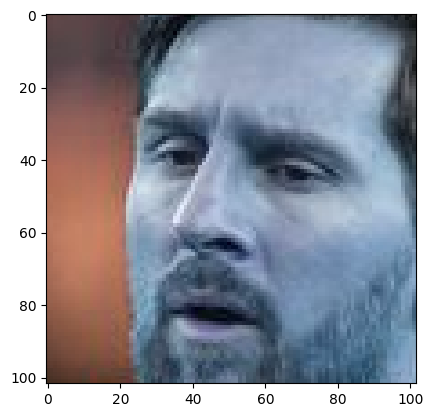

In [39]:
cropped_img = cropped_img_with_2_eyes('/content/drive/MyDrive/famous-people-detector/images_dataset/lionel_messi/1211643746.jpg.0.jpg')
plt.imshow(cropped_img)

# Data cleaning

In [25]:
import os
import shutil

In [26]:
path_to_data = '/content/drive/MyDrive/famous-people-detector/images_dataset'
path_to_cr_data = '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped' # to make a folder "cropped" inside folder "image_dataset"

In [ ]:
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/famous-people-detector/images_dataset/lionel_messi',
 '/content/drive/MyDrive/famous-people-detector/images_dataset/virat_kohli',
 '/content/drive/MyDrive/famous-people-detector/images_dataset/roger_federer',
 '/content/drive/MyDrive/famous-people-detector/images_dataset/maria_sharapova',
 '/content/drive/MyDrive/famous-people-detector/images_dataset/serena_williams']

In [ ]:
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # you can do this step manually by make a folder "cropepd" in your drive

In [ ]:
cropped_img_dirs = []
celebrity_files_name_dict = {}

for img_dir in img_dirs:
  count = 1
  celebrity_name = img_dir.split('/')[-1]
  print(celebrity_name)

  celebrity_files_name_dict[celebrity_name] = []

  for entry in os.scandir(img_dir):
    roi_color = cropped_img_with_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder = path_to_cr_data + '/' + celebrity_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_img_dirs.append(cropped_folder)
        print('cropped image created in folder: ', cropped_folder)

      cropped_file_name = celebrity_name + str(count) + '.png'
      cropped_file_path = cropped_folder + '/' + cropped_file_name

      cv2.imwrite(cropped_file_path, roi_color)
      celebrity_files_name_dict[celebrity_name].append(cropped_file_path)

      count += 1

lionel_messi
cropped image created in folder:  /content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi
virat_kohli
cropped image created in folder:  /content/drive/MyDrive/famous-people-detector/images_dataset/cropped/virat_kohli
roger_federer
cropped image created in folder:  /content/drive/MyDrive/famous-people-detector/images_dataset/cropped/roger_federer
maria_sharapova
cropped image created in folder:  /content/drive/MyDrive/famous-people-detector/images_dataset/cropped/maria_sharapova
serena_williams
cropped image created in folder:  /content/drive/MyDrive/famous-people-detector/images_dataset/cropped/serena_williams


after doing data cleaning with this code, you have to check your cropped image manually. just in case there are any errors, because the raw data has various conditions.

In [ ]:
celebrity_files_name_dict

{'lionel_messi': ['/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi1.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi2.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi3.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi4.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi5.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi6.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi7.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi8.png',
  '/content/drive/MyDrive/famous-people-detector/images_dataset/cropped/lionel_messi/lionel_messi9.png',
  '/content/drive/MyDrive/famous-people

# Feature engineering

In [22]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    # reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

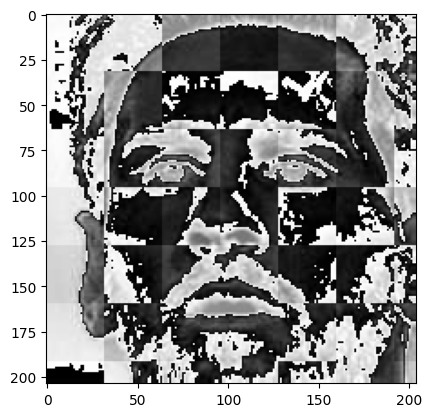

In [23]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

we need to re-fetch the path of each image. because the dictionary "celebrity_files_name_dict" stores the data before we manually clean the image files

if you want to simplifier the code, you can just add if statement to "continue" if the path is None

In [27]:
base_path = "/content/drive/MyDrive/famous-people-detector/images_dataset/cropped"

image_paths_dict = {}

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    # check if the path is a folder
    if os.path.isdir(folder_path):
        image_paths_dict[folder_name] = []
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # add path to dictionary if it is a file
            if os.path.isfile(file_path):
                image_paths_dict[folder_name].append(file_path)

In [28]:
X, y = [], []
for celebrity_name, training_files in image_paths_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    scalled_raw_img = cv2.resize(img, (32,32))
    img_har = w2d(img, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32,32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(celebrity_name)

In [29]:
len(X)

169

In [ ]:
len(X[0])

4096

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(169, 4096)

# Training Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

pipe.fit(X_train, y_train)

accuracy = pipe.score(X_test, y_test)
print(f"Akurasi model Logistic Regression: {accuracy:.2f}")


Akurasi model Logistic Regression: 0.93


In [ ]:
len(X_test)

43

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

                 precision    recall  f1-score   support

   lionel_messi       1.00      1.00      1.00         7
maria_sharapova       0.90      1.00      0.95         9
  roger_federer       0.83      0.71      0.77         7
serena_williams       0.88      0.88      0.88         8
    virat_kohli       1.00      1.00      1.00        12

       accuracy                           0.93        43
      macro avg       0.92      0.92      0.92        43
   weighted avg       0.93      0.93      0.93        43



now, let's use GridSearch to try out with different models

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.817538,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.627385,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.817231,{'logisticregression__C': 5}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test, y_test)

0.9069767441860465

In [ ]:
best_estimators['random_forest'].score(X_test, y_test)

0.6511627906976745

In [ ]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9302325581395349

best classification model in this case is logistic regression

# Simple end to end

In [34]:
def classify_celebrity(image_path):
    # Detect and crop the face with 2 eyes
    cropped_img = cropped_img_with_2_eyes(image_path)
    if cropped_img is None:
        return "Face with 2 eyes not detected"

    # Preprocess the image (resize, wavelet transform)
    scalled_raw_img = cv2.resize(cropped_img, (32, 32))
    img_har = w2d(cropped_img, 'db1', 5)
    scalled_img_har = cv2.resize(img_har, (32, 32))

    # Combine raw and wavelet-transformed features
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
    combined_img = combined_img.T  # Transpose to match the input shape

    # Predict using the trained model
    prediction = pipe.predict(combined_img)
    return prediction[0]


In [37]:
image_path = input("Enter the path of the image: ")
result = classify_celebrity(image_path)
print(f"Classification Result: {result}")


Enter the path of the image: /content/sample_data/1883363-39663138-2560-1440.jpg
Classification Result: lionel_messi


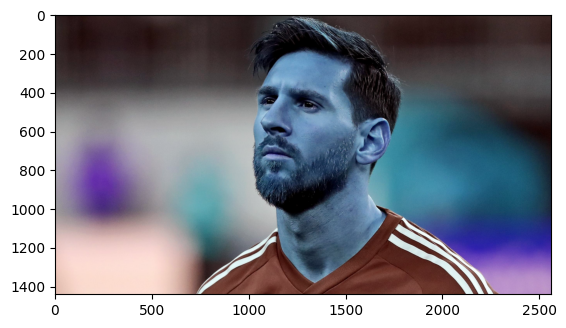

In [38]:
input_img = cv2.imread('/content/sample_data/1883363-39663138-2560-1440.jpg')
plt.imshow(input_img)